# Метрики и разбиение данных

In [4]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

cancer = datasets.load_breast_cancer()
logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

# по тренировочным данным
print('Accuracy: {:.2f}'.format(model.score(cancer.data, cancer.target)))

Accuracy: 0.95


/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [2]:
predictions = model.predict(cancer.data)


print('Accuracy: {:.2f}'.format(metrics.accuracy_score(cancer.target, predictions)))
print('ROC AUC: {:.2f}'.format(metrics.roc_auc_score(cancer.target, predictions)))
print('F1: {:.2f}'.format(metrics.f1_score(cancer.target, predictions)))
metrics.precision_score(cancer.target, predictions)

Accuracy: 0.95
ROC AUC: 0.94
F1: 0.96


0.947945205479452

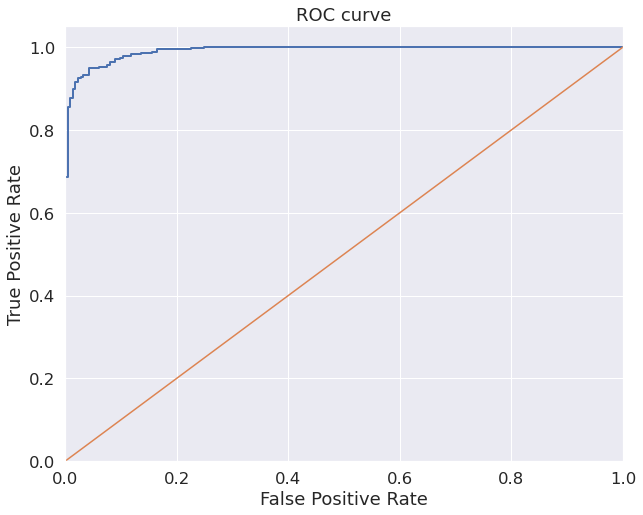

ROC AUC: 0.94
ROC AUC: 0.99


In [11]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(
    cancer.target, 
    model.predict_proba(cancer.data)[:,1], 
    pos_label=1
)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()
print('ROC AUC: {:.2f}'.format(metrics.roc_auc_score(cancer.target, predictions)))
print('ROC AUC: {:.2f}'.format(
    metrics.roc_auc_score(cancer.target, 
        model.predict_proba(cancer.data)[:,1]))
)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    test_size=0.2, random_state=12
)
model = logistic_regression.fit(x_train, y_train)

print('Train accuracy: {:.2f}'.format(model.score(x_train, y_train)))
print('Test accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Train accuracy: 0.95
Test accuracy: 0.93


/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

boston = datasets.load_boston()

lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

for model in [lasso, ridge, elastic]:
    x_train, x_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target,
        test_size=0.2
    )
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    print(model.__class__)
    print('MSE: {:.2f}\n'.format(metrics.mean_squared_error(y_test, predictions)))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 0.11

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 0.08

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 0.11



In [13]:
print('R2: {:.2f}'.format(model.score(x_test, y_test)))
print('R2: {:.2f}'.format(metrics.r2_score(y_test, predictions)))

R2: 0.57
R2: 0.57


# Кросс-валидация

In [14]:
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(iris.DESCR[:475])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Vi


In [16]:
logistic_regression = LogisticRegression()
cv = KFold(n_splits=5)  # +StratifiedKFold

for split_idx, (train_idx, test_idx) in enumerate(cv.split(iris.data)):
    x_train, x_test = iris.data[train_idx], iris.data[test_idx]
    y_train, y_test = iris.target[train_idx], iris.target[test_idx]

    logistic_regression.fit(x_train, y_train)
    score = logistic_regression.score(x_test, y_test)
    print('Split {} Score: {:.2f}'.format(split_idx, score))

/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

Split 0 Score: 1.00
Split 1 Score: 1.00
Split 2 Score: 0.87
Split 3 Score: 0.93
Split 4 Score: 0.83


/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
cv_score = cross_val_score(
    logistic_regression, iris.data, iris.target,
    scoring='accuracy', cv=cv
)

print('Cross val score: {}'.format(cv_score))
print('Mean cross val score: {:.2f}'.format(cv_score.mean()))

/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

Cross val score: [1.         1.         0.86666667 0.93333333 0.83333333]
Mean cross val score: 0.93


/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
